# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [3]:
df = pd.read_csv('New daddy.txt',delimiter='\t',skipfooter=14,engine='python')

In [4]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,46.72
1,NaN,"Jan 02, 1979",1979/01/02,48.31
2,NaN,"Jan 03, 1979",1979/01/03,42.77
3,NaN,"Jan 04, 1979",1979/01/04,20.57
4,NaN,"Jan 05, 1979",1979/01/05,21.16
...,...,...,...,...
12049,NaN,"Dec 28, 2011",2011/12/28,45.21
12050,NaN,"Dec 29, 2011",2011/12/29,28.49
12051,NaN,"Dec 30, 2011",2011/12/30,38.08
12052,NaN,"Dec 31, 2011",2011/12/31,42.58


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [5]:
df = df[df.Notes != 'Total']
df = df.drop('Notes',1)

>3) Make a column called Date that is in the pandas datetime format

In [5]:
df['Date'] = pd.to_datetime(df['Month Day, Year'], errors='raise')

>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [6]:
df["Day"] = df['Date'].map(lambda x: x.day)
df["Month"] = df['Date'].map(lambda x: x.month)
df["Year"] = df['Date'].map(lambda x: x.year)
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Day,Month,Year
0,"Jan 01, 1979",1979/01/01,46.72,1979-01-01,1,1,1979
1,"Jan 02, 1979",1979/01/02,48.31,1979-01-02,2,1,1979
2,"Jan 03, 1979",1979/01/03,42.77,1979-01-03,3,1,1979
3,"Jan 04, 1979",1979/01/04,20.57,1979-01-04,4,1,1979
4,"Jan 05, 1979",1979/01/05,21.16,1979-01-05,5,1,1979
...,...,...,...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,47.60,2011-12-27,27,12,2011
12049,"Dec 28, 2011",2011/12/28,45.21,2011-12-28,28,12,2011
12050,"Dec 29, 2011",2011/12/29,28.49,2011-12-29,29,12,2011
12051,"Dec 30, 2011",2011/12/30,38.08,2011-12-30,30,12,2011


In [7]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Day,Month,Year,DateInt
0,"Jan 01, 1979",1979/01/01,46.72,1979-01-01,1,1,1979,2839968.0
1,"Jan 02, 1979",1979/01/02,48.31,1979-01-02,2,1,1979,2840832.0
2,"Jan 03, 1979",1979/01/03,42.77,1979-01-03,3,1,1979,2841696.0
3,"Jan 04, 1979",1979/01/04,20.57,1979-01-04,4,1,1979,2842560.0
4,"Jan 05, 1979",1979/01/05,21.16,1979-01-05,5,1,1979,2843424.0
...,...,...,...,...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,47.60,2011-12-27,27,12,2011,13249440.0
12049,"Dec 28, 2011",2011/12/28,45.21,2011-12-28,28,12,2011,13250304.0
12050,"Dec 29, 2011",2011/12/29,28.49,2011-12-29,29,12,2011,13251168.0
12051,"Dec 30, 2011",2011/12/30,38.08,2011-12-30,30,12,2011,13252032.0


## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

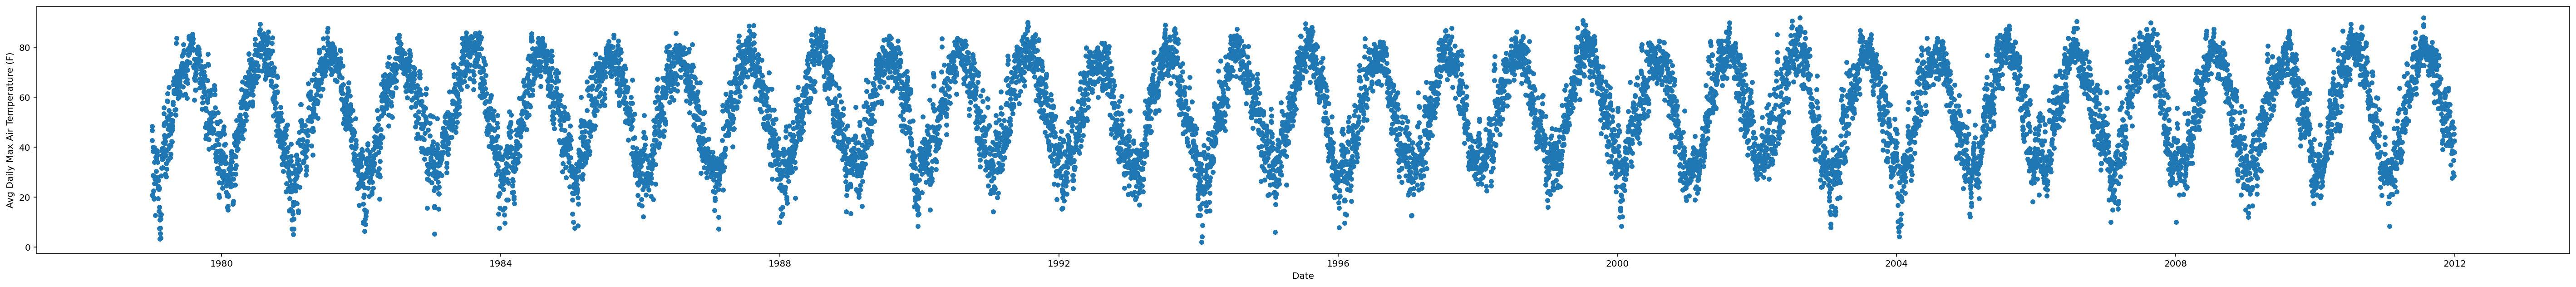

In [8]:
df.plot.scatter('Date', 'Avg Daily Max Air Temperature (F)', figsize=(50, 5))

>5) Describe your plot.

In [9]:
#The plot looks like somthing from the Antman movie, liek when they go through the time traveling tunnel.

### Adding colors for our graph

In [10]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

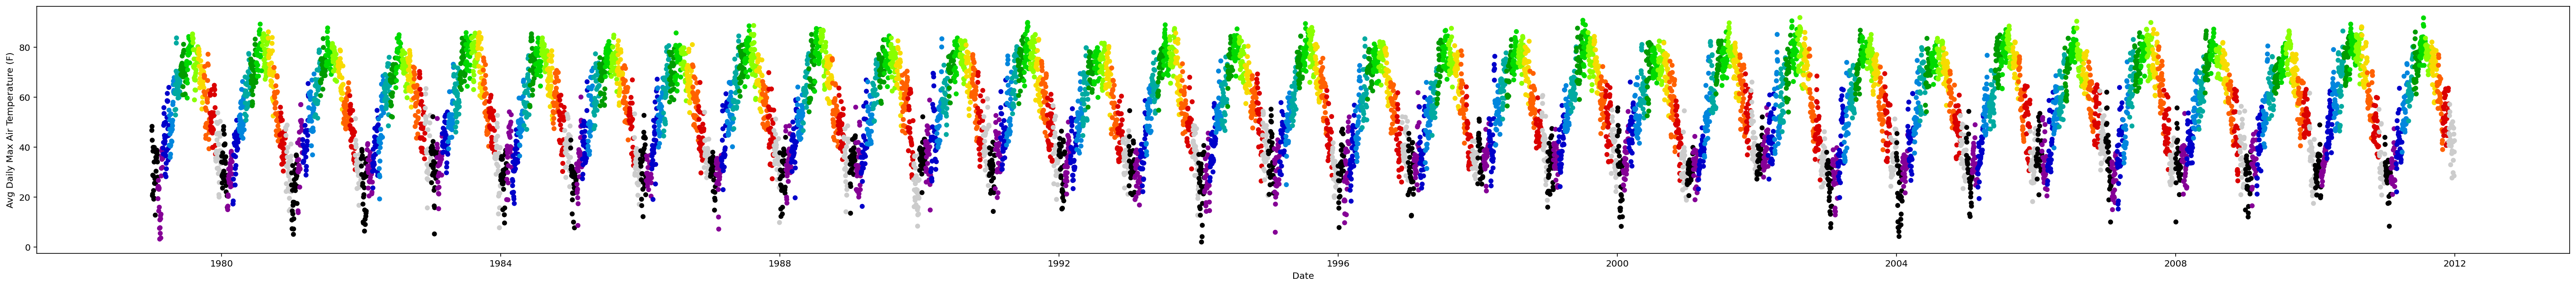

In [11]:
df.plot.scatter('Date', 'Avg Daily Max Air Temperature (F)', figsize=(50, 5), c=df['color'])

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [12]:
df7 = df[df['Year'] == 2002]
month6 = df7[df7['Month'] < 7]
month6

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Day,Month,Year,DateInt,color
8401,"Jan 01, 2002",2002/01/01,27.21,2002-01-01,1,1,2002,10098432.0,#000000
8402,"Jan 02, 2002",2002/01/02,29.39,2002-01-02,2,1,2002,10099296.0,#000000
8403,"Jan 03, 2002",2002/01/03,30.20,2002-01-03,3,1,2002,10100160.0,#000000
8404,"Jan 04, 2002",2002/01/04,28.94,2002-01-04,4,1,2002,10101024.0,#000000
8405,"Jan 05, 2002",2002/01/05,34.19,2002-01-05,5,1,2002,10101888.0,#000000
...,...,...,...,...,...,...,...,...,...
8577,"Jun 26, 2002",2002/06/26,84.83,2002-06-26,26,6,2002,10250496.0,#009c00
8578,"Jun 27, 2002",2002/06/27,81.58,2002-06-27,27,6,2002,10251360.0,#009c00
8579,"Jun 28, 2002",2002/06/28,77.08,2002-06-28,28,6,2002,10252224.0,#009c00
8580,"Jun 29, 2002",2002/06/29,76.93,2002-06-29,29,6,2002,10253088.0,#009c00


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

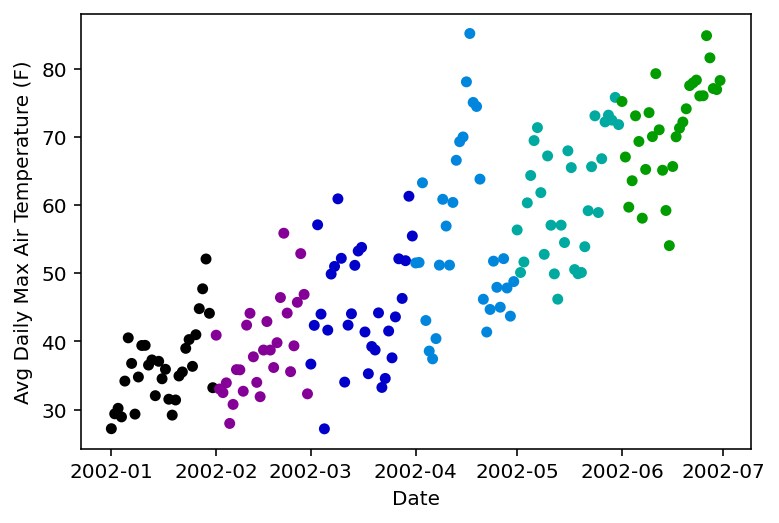

In [13]:
month6.plot.scatter('Date', 'Avg Daily Max Air Temperature (F)', c=month6['color'])

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [14]:
X=month6['DateInt'].values
Y=month6['Avg Daily Max Air Temperature (F)'].values

In [15]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [16]:
Y_pred = lin_reg(X,Y)

0.00027867516495509124 -2784.424194159431


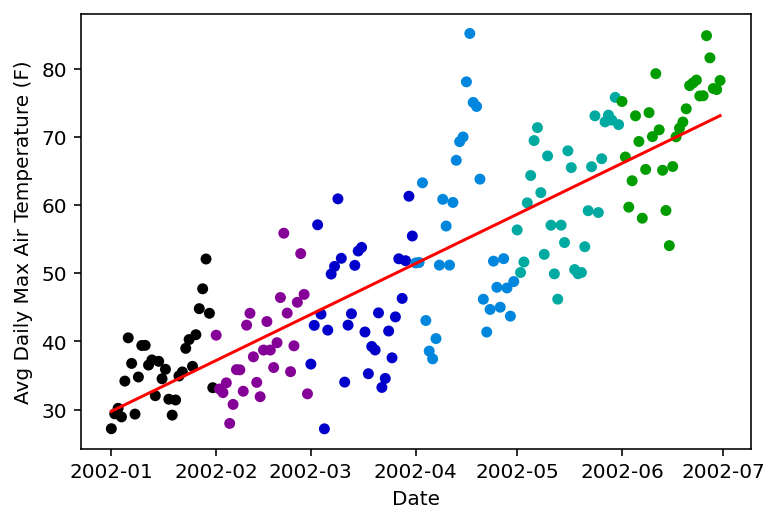

In [17]:
month6.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=month6['color'])
plt.plot([min(month6['Date'].values), max(month6['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

In [18]:
#slope = 0.00027867516495509124
#intercept = -2784.424194159431

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [19]:
print(min(Y_pred))
print(max(Y_pred))

29.758009228341052
73.09757088215656


## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [20]:
#declare x and y values for full data set
xFull=df['DateInt'].values
yFull=df['Avg Daily Max Air Temperature (F)'].values

In [21]:
Y_full = lin_reg(xFull,yFull)

2.635836937952367e-07 52.82096429441523


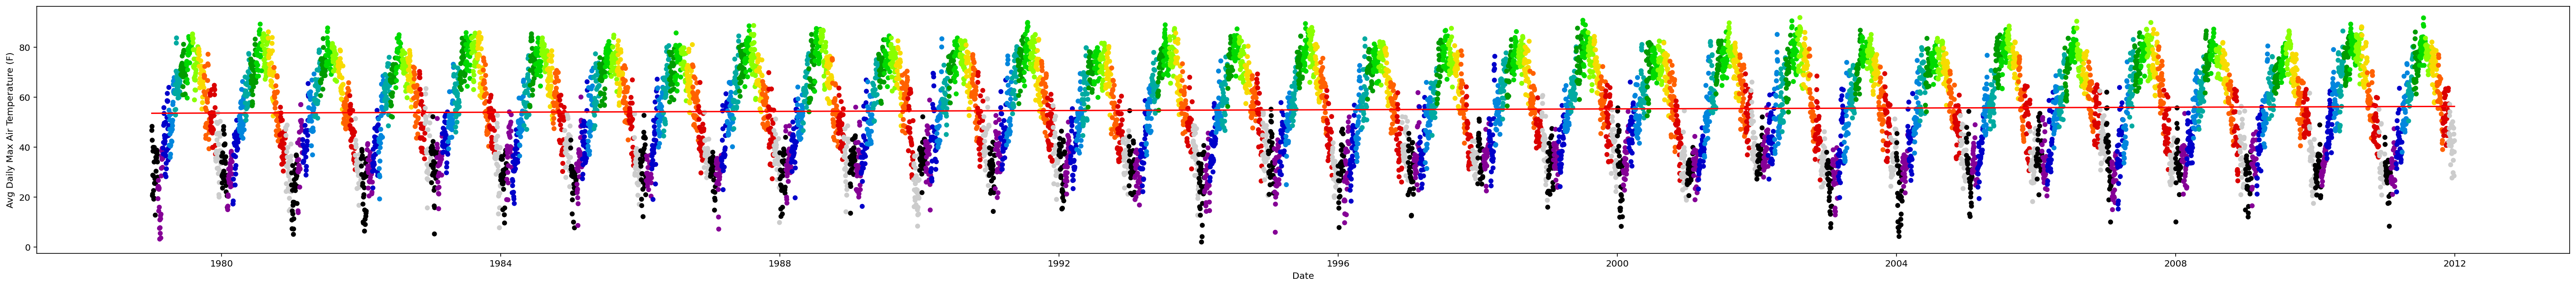

In [22]:
#plot line over top of data
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', figsize = (50, 5), c=df['color'])
plt.plot([min(df['Date'].values), max(df['Date']. values)], [min(Y_full), max(Y_full)], color='red') # best fit line
plt. show()

>12) Is the slope positive or negative? What do you think that means?

In [23]:
#12
#The slope is postitive 
#the globe is getting warmer 